# Sprint11課題 深層学習スクラッチディープニューラルネットワーク

## 2.スクラッチによる実装

### 【問題1】全結合層のクラス化

In [1]:
import numpy as np

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    def forward(self, Z):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        self.forward_Z = Z.copy()
        A = np.dot(Z, self.W) + self.B
        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.dB = dA
        self.dW = np.dot(self.forward_Z.T, dA)
        dZ = np.dot(dA, self.W.T)
        # 更新
        self = self.optimizer.update(self)
        return dZ


### 【問題2】初期化方法のクラス化

In [2]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2)
        return B

### 【問題3】最適化手法のクラス化

In [3]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, alpha):
        self.alpha = alpha
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        layer.W -= self.alpha * layer.dW
        layer.B -= self.alpha * layer.dB.mean(axis=0)
        return layer

### 【問題4】活性化関数のクラス化

In [4]:
class Tanh:
    """
    活性化関数 Tanh
    """
    def __init__(self):
        self.forward_A = None
    
    def forward(self, A):
        self.forward_A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1-np.tanh(self.forward_A)**2)

In [5]:
class Softmax():
    """
    ステップ関数　Softmap
    """
    def __init__(self):
        self.forward_A = None
    
    def forward(self, A):
        self.forward_A = A
        if A.ndim == 2:
            A = A.T
            A = A - np.max(A, axis=0)
            self.Z = np.exp(A) / np.sum(np.exp(A), axis=0)
            return self.Z.T

        A = A - np.max(A)
        Z = np.exp(A) / np.sum(np.exp(A)) 
        self.Z = Z
        return self.Z

    
    def backward(self,y):
        return self.Z.T - y


### 【問題5】ReLUクラスの作成

In [6]:
class ReLU:
    """
    活性化関数 ReLU
    """
    def __init__(self):
        self.forward_A = None
    
    def forward(self, A):
        self.forward_A = A
        return np.maximum(A, 0)
    
    def backward(self, dZ):
        return dZ * np.where(self.forward_A>0, 1, 0)

### 【問題6】重みの初期値

In [7]:
class XavierInitializer:
    """
    Xavierによる初期化
    シグモイド関数やハイパボリックタンジェント関数の
    ときはXavierの初期値が使われる
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [8]:
class HeInitializer:
    """
    Heによる初期化
    ReLUのときはHeの初期値が使われる
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        self.sigma = np.sqrt(2/n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2)
        return B

### 【問題7】最適化手法

In [9]:
class AdaGrad:
    """
    AdaGradによる最適化
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, alpha=0.01):
        self.alpha = alpha
        self.hW = 0
        self.hB = 0
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        print('layer.dw', layer.dW.shape)
        self.hW += (layer.dW)**2
        self.hB += (layer.dB)**2
        layer.W -= self.alpha * (1/np.sqrt(self.hW +1e-7)) * layer.dW #0除算を防ぐ為、+1e-7を追加
        layer.B -= self.alpha * (1/np.sqrt(self.hB.mean(axis=0)+1e-7)) * layer.dB.mean(axis=0) #0除算を防ぐ為、+1e-7を追加
        return layer

バッチ作成

In [10]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [11]:
"""
使用するデータセットを用意
"""
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

Using TensorFlow backend.


(60000,)
(60000, 10)
float64
(48000, 784)
(12000, 784)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDeepNeuralNetrowkClassifier:
    def __init__(self, n_epocs, batch_size, n_nodes1, n_nodes2, alpha=0.0001, sigma=0.01, n_output=10):
        self.n_epocs = n_epocs
        self.alpha = alpha
        self.sigma = sigma
        self.batch_size = batch_size
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.loss = np.zeros(n_epocs)
        self.val_loss = np.zeros(n_epocs)
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.n_features =X.shape[1]
        train_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        test_mini_batch = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
        optimizer = SGD(self.alpha)
        self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
        self.activation3 = Softmax()
        for epoch in range(self.n_epocs):
            for i, (mini_X, mini_y) in enumerate(train_mini_batch):
                X = mini_X
                y = mini_y
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                dA3 = self.activation3.backward(y) #y^ - y
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                
            loss = np.sum(-mini_y*np.log(Z3))
            self.loss[epoch] = loss
            val_loss = np.sum(-test_mini_batch[i][1]*np.log(self._calculate_Z3(test_mini_batch[i][0])))
            self.val_loss[epoch] = val_loss
        return self.loss

    def _calculate_Z3(self, X):
        A1= self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3

    def predict(self, X):
        A1_predict = self.FC1.forward(X)
        Z1_predict = self.activation1.forward(A1_predict)
        A2_predict = self.FC2.forward(Z1_predict)
        Z2_predict = self.activation2.forward(A2_predict)
        A3_predict = self.FC3.forward(Z2_predict)
        Z3_predict = self.activation3.forward(A3_predict)
        return np.argmax((Z3_predict), axis=1)

    def plot(self):
        plt.figure(figsize=(10, 5))
        plt.title("DNN cost")
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.plot(self.loss, label="train_loss")
#         plt.plot(self.val_loss, label="val_loss")
#         plt.yscale("log")
        plt.legend()

In [13]:
DNN = ScratchDeepNeuralNetrowkClassifier(n_epocs=500, batch_size=500, n_nodes1=300, n_nodes2=200)

In [14]:
DNN.fit(X_train.astype('f'), y_train.astype('f'), X_val, y_val)

array([1144.72987146, 1107.62140613,  777.90966855,  500.65430563,
        386.07615176,  326.19835476,  283.71800994,  251.77304342,
        229.00841252,  212.89308786,  200.87581376,  191.30660762,
        183.28517618,  176.34285352,  170.22233877,  164.76278537,
        159.84984902,  155.39604286,  151.3326482 ,  147.60555822,
        144.17233933,  140.99947562,  138.05944983,  135.32778571,
        132.7805153 ,  130.39262737,  128.13781664,  125.98939156,
        123.921797  ,  121.91210757,  119.94104692,  117.9933978 ,
        116.05790178,  114.12684033,  112.19547671,  110.26148191,
        108.3244103 ,  106.38525038,  104.44605301,  102.50962923,
        100.57930693,   98.65873563,   96.75172961,   94.86214135,
         92.99375787,   91.15021345,   89.3349124 ,   87.55095726,
         85.80108113,   84.08758736,   82.41230325,   80.77655515,
         79.18116985,   77.62650352,   76.11249486,   74.63873568,
         73.20455011,   71.80907338,   70.4513229 ,   69.13025

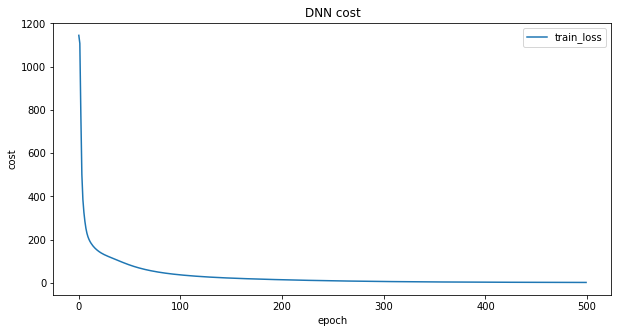

In [15]:
DNN.plot()

In [16]:
DNN.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, DNN.predict(X_test))


0.9791

重みの初期値にXavierを使用

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDNNClassifierXavier:
    def __init__(self, n_epocs, batch_size, n_nodes1, n_nodes2, alpha=0.001, sigma=0.01, n_output=10):
        self.n_epocs = n_epocs
        self.alpha = alpha
        self.sigma = sigma
        self.batch_size = batch_size
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.loss = np.zeros(n_epocs)
        self.val_loss = np.zeros(n_epocs)
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.n_features =X.shape[1]
        train_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        test_mini_batch = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
        optimizer = SGD(self.alpha)
        self.FC1 = FC(self.n_features, self.n_nodes1, XavierInitializer(self.sigma), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, XavierInitializer(self.sigma), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(self.n_nodes2, self.n_output, XavierInitializer(self.sigma), optimizer)
        self.activation3 = Softmax()
        for epoch in range(self.n_epocs):
            for i, (mini_X, mini_y) in enumerate(train_mini_batch):
                X = mini_X
                y = mini_y
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                dA3 = self.activation3.backward(y) #y^ - y
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                
            loss = np.sum(-mini_y*np.log(Z3))
            self.loss[epoch] = loss
            val_loss = np.sum(-test_mini_batch[i][1]*np.log(self._calculate_Z3(test_mini_batch[i][0])))
            self.val_loss[epoch] = val_loss
        return self.loss

    def _calculate_Z3(self, X):
        A1= self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3

    def predict(self, X):
        A1_predict = self.FC1.forward(X)
        Z1_predict = self.activation1.forward(A1_predict)
        A2_predict = self.FC2.forward(Z1_predict)
        Z2_predict = self.activation2.forward(A2_predict)
        A3_predict = self.FC3.forward(Z2_predict)
        Z3_predict = self.activation3.forward(A3_predict)
        return np.argmax((Z3_predict), axis=1)

    def plot(self):
        plt.figure(figsize=(10, 5))
        plt.title("DNN(Xavier) cost")
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.plot(self.loss, label="train_loss")
#         plt.plot(self.val_loss, label="val_loss")
#         plt.yscale("log")
        plt.legend()

In [19]:
DNN_Xavier = ScratchDNNClassifierXavier(n_epocs=500, batch_size=500, n_nodes1=300, n_nodes2=200)

In [20]:
DNN_Xavier.fit(X_train.astype('f'), y_train.astype('f'), X_val, y_val)

array([1.52971712e+02, 1.15412800e+02, 9.15257736e+01, 7.47595431e+01,
       6.31388391e+01, 5.46501408e+01, 4.80220567e+01, 4.25612520e+01,
       3.79439684e+01, 3.40105779e+01, 3.06553087e+01, 2.77824861e+01,
       2.53023263e+01, 2.31411566e+01, 2.12432139e+01, 1.95646216e+01,
       1.80675343e+01, 1.67196816e+01, 1.54958866e+01, 1.43773576e+01,
       1.33499644e+01, 1.24030301e+01, 1.15285002e+01, 1.07202274e+01,
       9.97328132e+00, 9.28315169e+00, 8.64524290e+00, 8.05501776e+00,
       7.50849768e+00, 7.00267593e+00, 6.53548179e+00, 6.10525055e+00,
       5.71014854e+00, 5.34793628e+00, 5.01603392e+00, 4.71171261e+00,
       4.43229956e+00, 4.17533630e+00, 3.93866179e+00, 3.72042454e+00,
       3.51904618e+00, 3.33315756e+00, 3.16152602e+00, 3.00299491e+00,
       2.85645085e+00, 2.72081835e+00, 2.59507374e+00, 2.47826989e+00,
       2.36956172e+00, 2.26822008e+00, 2.17362519e+00, 2.08524292e+00,
       2.00259735e+00, 1.92525049e+00, 1.85279230e+00, 1.78483789e+00,
      

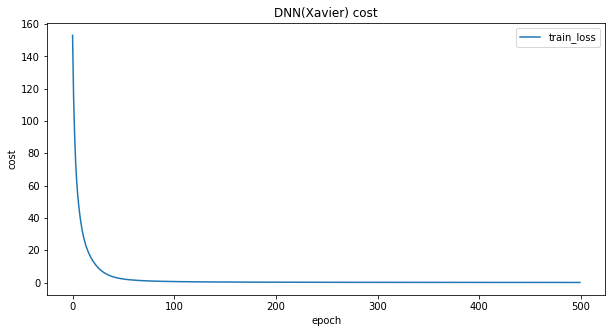

In [21]:
DNN_Xavier.plot()

In [22]:
DNN_Xavier.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, DNN_Xavier.predict(X_test))


0.9807

初期値にHe、活性化関数にRelu関数を使用

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDNNClassifierHeRelu:
    def __init__(self, n_epocs, batch_size, n_nodes1, n_nodes2, alpha=0.001, sigma=0.01, n_output=10):
        self.n_epocs = n_epocs
        self.alpha = alpha
        self.sigma = sigma
        self.batch_size = batch_size
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.loss = np.zeros(n_epocs)
        self.val_loss = np.zeros(n_epocs)
    
    def fit(self, X, y, X_val=None, y_val=None):
        self.n_features =X.shape[1]
        train_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        test_mini_batch = GetMiniBatch(X_val, y_val, batch_size=self.batch_size)
        optimizer = SGD(self.alpha)
        self.FC1 = FC(self.n_features, self.n_nodes1, HeInitializer(self.sigma), optimizer)
        self.activation1 = ReLU()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, HeInitializer(self.sigma), optimizer)
        self.activation2 = ReLU()
        self.FC3 = FC(self.n_nodes2, self.n_output, HeInitializer(self.sigma), optimizer)
        self.activation3 = Softmax()
        for epoch in range(self.n_epocs):
            for i, (mini_X, mini_y) in enumerate(train_mini_batch):
                X = mini_X
                y = mini_y
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                dA3 = self.activation3.backward(y) #y^ - y
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                
            loss = np.sum(-mini_y*np.log(Z3))
            self.loss[epoch] = loss
            val_loss = np.sum(-test_mini_batch[i][1]*np.log(self._calculate_Z3(test_mini_batch[i][0])))
            self.val_loss[epoch] = val_loss
        return self.loss, self.val_loss
    
    def _calculate_Z3(self, X):
        A1= self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3

    def predict(self, X):
        A1_predict = self.FC1.forward(X)
        Z1_predict = self.activation1.forward(A1_predict)
        A2_predict = self.FC2.forward(Z1_predict)
        Z2_predict = self.activation2.forward(A2_predict)
        A3_predict = self.FC3.forward(Z2_predict)
        Z3_predict = self.activation3.forward(A3_predict)
        return np.argmax((Z3_predict), axis=1)

    def plot(self):
        plt.figure(figsize=(10, 5))
        plt.title("DNN(He,Relu) cost")
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.plot(self.loss, label="train_loss")
        plt.plot(self.val_loss, label="val_loss")
#         plt.yscale("log")
        plt.legend()

In [25]:
DNN_ReLU = ScratchDNNClassifierHeRelu(n_epocs=30, batch_size=50, n_nodes1=300, n_nodes2=200)

In [26]:
DNN_ReLU.fit(X_train[:12000].astype('f'), y_train[:12000].astype('f'), X_val, y_val)

(array([26.42481988, 20.89840826, 18.14263231, 16.52473622, 15.21324016,
        13.71225618, 12.38009539, 11.12992236, 10.01470278,  8.8952036 ,
         7.83817119,  6.87427833,  6.00511267,  5.251682  ,  4.49418068,
         3.78279226,  3.14241164,  2.55635226,  2.11641386,  1.75311618,
         1.47796853,  1.2568839 ,  1.08525435,  0.95414736,  0.84467952,
         0.76016669,  0.68318889,  0.62501712,  0.57155753,  0.52775141]),
 array([19.73545449, 16.03546518, 13.72581844, 11.96945587, 10.68470851,
         9.56358967,  8.84026922,  8.38760784,  8.03211685,  7.76290336,
         7.65588944,  7.62383872,  7.59481322,  7.63535804,  7.68186305,
         7.73191074,  7.76726673,  7.81161054,  7.79958851,  7.82119956,
         7.91878252,  7.9681273 ,  8.04288727,  8.09486773,  8.16448913,
         8.18517266,  8.21152381,  8.28177923,  8.319894  ,  8.34128425]))

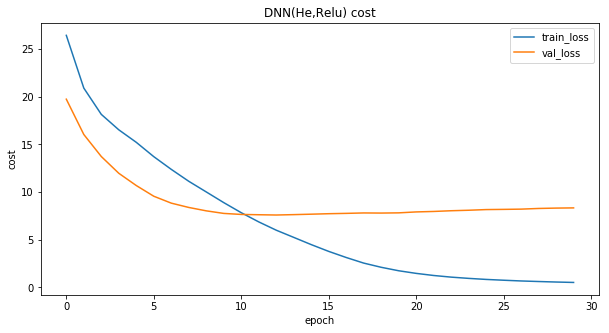

In [27]:
DNN_ReLU.plot()

In [28]:
DNN_ReLU.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, DNN_ReLU.predict(X_test))


0.9628

ランダムに初期値設定したり、tanhを使用するよりもHe、ReLUを使用したほうが早く収束している。